In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
sns.set(
    'paper', 
    style='ticks'
)

In [3]:
tips = sns.load_dataset('tips')
iris = sns.load_dataset("iris")

### Introduction to Figure class

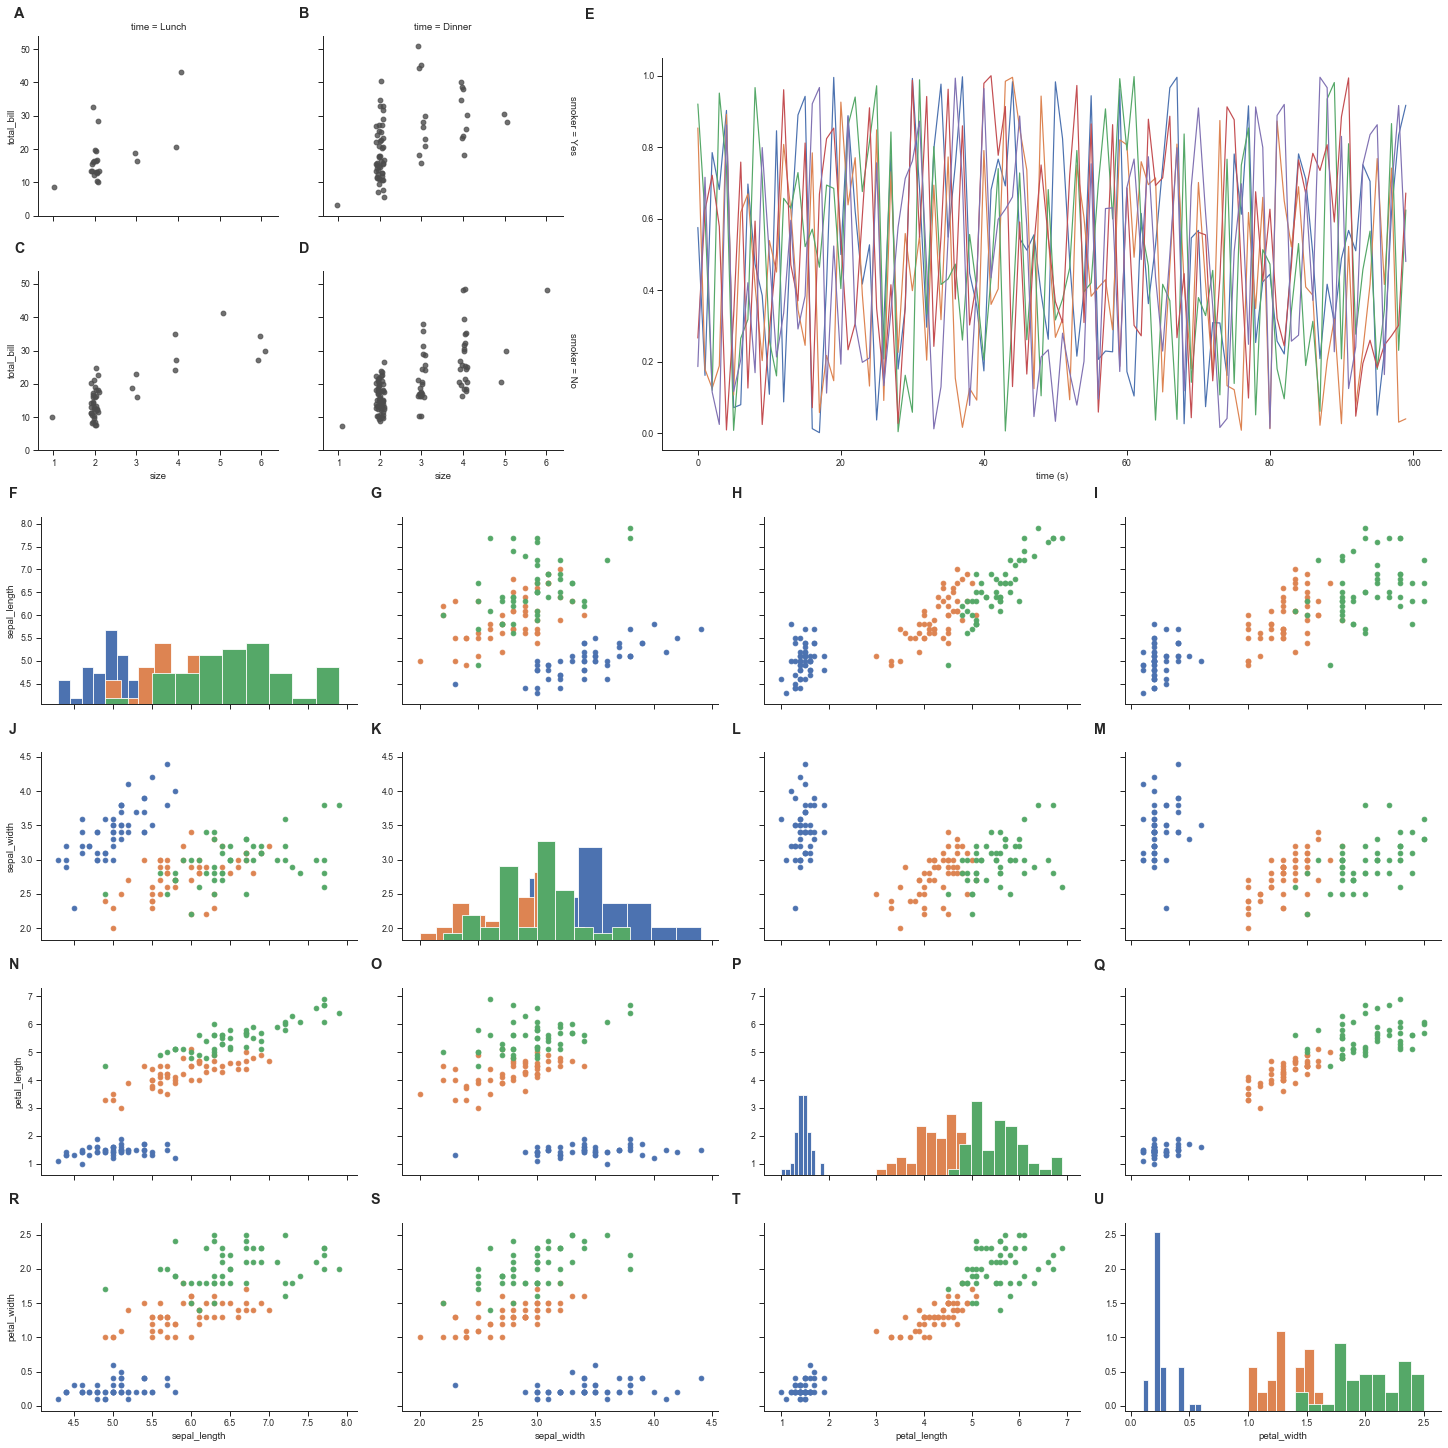

In [4]:
f = sns.Figure(
    3, 5, 
    figsize=(20, 20), 
    constrained_layout=True # experimental feature in matplotlib.Figure
)

g = f[0, :2].add_facetgrid(
    tips, row="smoker", col="time", margin_titles=True
)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)
# g.add_legend() # Does not work properly yet using sns.Figure

ax = f[0, 2:].add_subplot()
ax.plot(np.arange(100), np.random.random((100, 5)))
ax.set_xlabel('time (s)')

g = f[1:, :].add_pairgrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
# g.add_legend()

f.add_panel_letters()

### Introduction to using scalebar in facetgrid

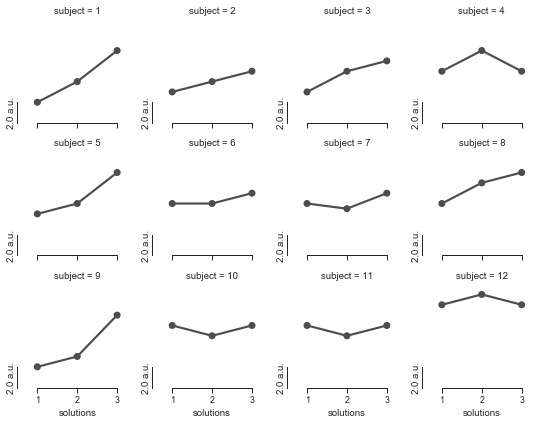

In [8]:
# using scalebar
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(
    attend, col="subject", col_wrap=4, 
    height=2, ylim=(0, 10))
g.map(
    sns.pointplot, 
    "solutions", "score", order=[1, 2, 3], 
    color=".3", ci=None)

g.use_scalebar(
    yunits='a.u.', infer_sizes='infer_y', 
    xunits=None,
)

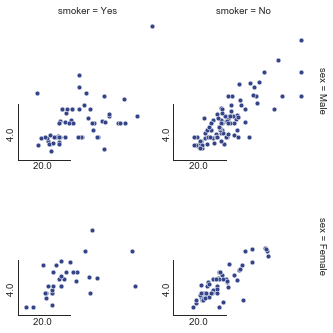

In [13]:
g = sns.FacetGrid(tips, row="sex", col="smoker", 
                  margin_titles=True, height=2.5)
g.map(
    plt.scatter, "total_bill", "tip", color="#334488", 
    edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.use_scalebar()

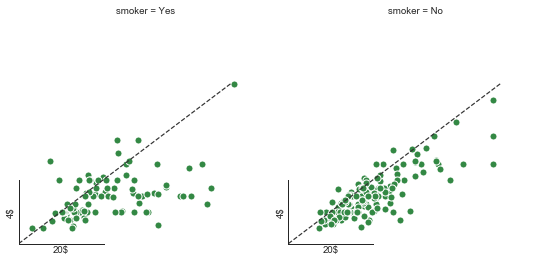

In [19]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14))
g.use_scalebar(ysize=4, xsize=20, 
               yunits='{}$', xunits='{}$', 
               yformat=True, xformat=True)